In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
import matplotlib.colors as mcolors
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')

In [3]:
dfi_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfi_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O2/Run1.txt', delimiter=' ' , dtype= np.float64)
dfi_O1 = dfi_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfi_O2 = pd.concat([dfi_O2['Delays'], dfi_O2['Time-delay1']], axis=1)
dfi = dfi_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfi = pd.concat([dfi['Delays'], dfi_O1['O1'], dfi['O2']], axis=1)

In [4]:
dfit1_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit1_O2_run1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O2/Run1.txt', delimiter=' ' , 
                           dtype= np.float64)
dfit1_O2_run2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O2/Run2.txt', delimiter=' ' , 
                           dtype= np.float64)
dfit1_O1 = dfit1_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit1_O1 = pd.concat([dfit1_O1['Delays'], dfit1_O1['O1']], axis=1)
dfit1_O2_run1 = dfit1_O2_run1.rename(columns={"Time-delay1": "O2 (Run 1)"}, errors="raise")
dfit1_O2_run2 = dfit1_O2_run2.rename(columns={"Time-delay1": "O2 (Run 2)"}, errors="raise")
dfit1_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit1_O2_run1['O2 (Run 1)'], dfit1_O2_run2['O2 (Run 2)']], axis=1)

In [5]:
dfit2_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it2/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit2_O1 = dfit2_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit2_O1 = pd.concat([dfit2_O1['Delays'], dfit2_O1['O1']], axis=1)

In [6]:
dfit2_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it2/O2/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit2_O2 = dfit2_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfit2_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit2_O2['O2']], axis=1)

In [7]:
dfit3_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it3/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit3_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it3/O2/Run2.txt', delimiter=' ' , dtype= np.float64)
dfit3_O1.drop(['Delays', 'Time-delay2', 'Time-delay3', 'Time-delay4'], axis=1, inplace = True)
dfit3_O2.drop(['Delays', 'Time-delay2', 'Time-delay3', 'Time-delay4'], axis=1, inplace = True)
dfit3_O1 = dfit3_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit3_O1 = pd.concat([dfit1_O1['Delays'], dfit3_O1['O1']], axis=1)
dfit3_O2 = dfit3_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfit3_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit3_O2['O2']], axis=1)

In [8]:
dfit4_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it4/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit4_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it4/O2/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit4_O1.drop(['Delays', 'Time-delay2', 'Time-delay3', 'Time-delay4'], axis=1, inplace = True)
dfit4_O2.drop(['Delays', 'Time-delay2', 'Time-delay3', 'Time-delay4'], axis=1, inplace = True)
dfit4_O1 = dfit4_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit4_O1 = pd.concat([dfit1_O1['Delays'], dfit4_O1['O1']], axis=1)
dfit4_O2 = dfit4_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfit4_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit4_O2['O2']], axis=1)

In [9]:
colors=['darkred', 'crimson', 'red', 'indianred']

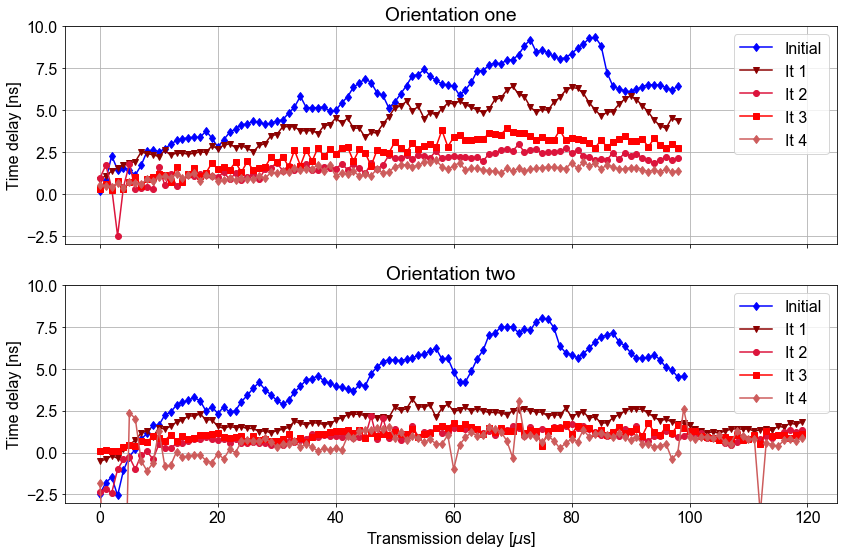

In [10]:
fig, ax = plt.subplots(2, 1, figsize =(12, 8), sharex = True)
ax[0].plot(dfi['Delays'], dfi['O1'], '-d', color = 'b', label='Initial')
ax[0].plot(dfit1_O1['Delays'], dfit1_O1['O1'], '-v', color = colors[0], label='It 1')
ax[0].plot(dfit2_O1['Delays'], dfit2_O1['O1'], '-o', color = colors[1], label='It 2')
ax[0].plot(dfit3_O1['Delays'], dfit3_O1['O1'], '-s', color = colors[2], label='It 3')
ax[0].plot(dfit4_O1['Delays'], dfit4_O1['O1'], '-d', color = colors[3], label='It 4')

ax[1].plot(dfi['Delays'], dfi['O2'],'-d', color = 'b', label='Initial')
# [ax[1].plot(dfit1_O2['Delays'], dfit1_O2[i], label=i) for i in dfit1_O2.keys()[1:]]
ax[1].plot(dfit1_O2['Delays'], dfit1_O2['O2 (Run 1)'], '-v', color = colors[0], label='It 1')
ax[1].plot(dfit2_O2['Delays'], dfit2_O2['O2'], '-o', color = colors[1],  label='It 2')
ax[1].plot(dfit3_O2['Delays'], dfit3_O2['O2'], '-s', color = colors[2],  label='It 3')
ax[1].plot(dfit4_O2['Delays'], dfit4_O2['O2'], '-d', color = colors[3], label='It 4')

ax[1].legend()
[ax[i].set_ylabel('Time delay [ns]') for i in range(2)]
[ax[i].set_ylim(-3.0, 10.0) for i in range(2)]
[ax[i].grid() for i in range(2)]
[ax[i].legend() for i in range(2)]
ax[1].set_xlabel('Transmission delay [$\mu$s]')
ax[0].set_title('Orientation one')
ax[1].set_title('Orientation two')
plt.tight_layout()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/NS/Salt-freeze2Dplot.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

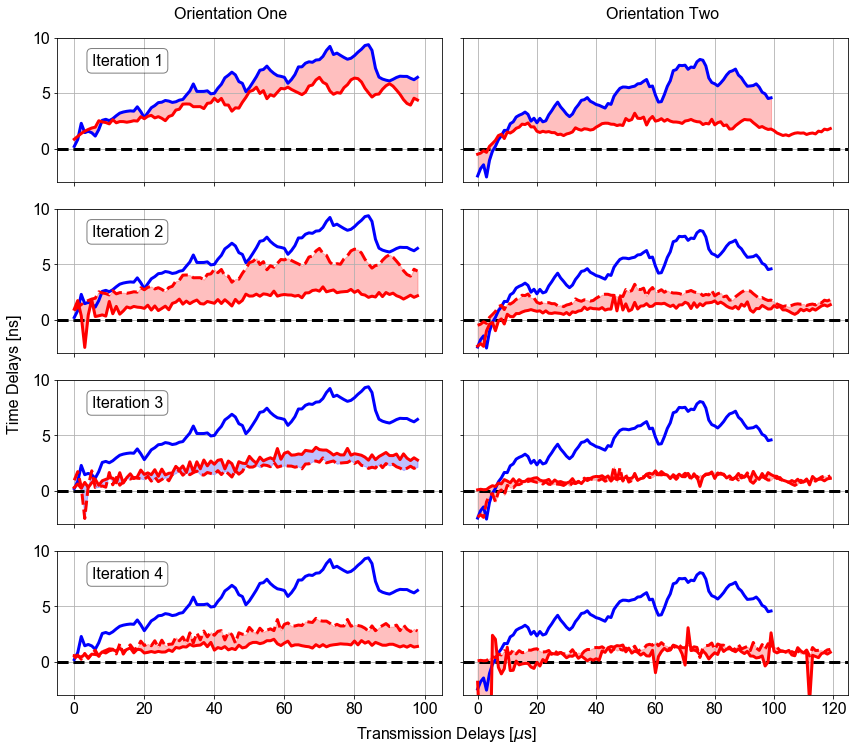

In [44]:
fig, ax = plt.subplots(4,2, figsize = (12,10), sharey=True, sharex='col')
delays_O1 = [dfit1_O1['Delays'], dfit2_O1['Delays'], dfit3_O1['Delays'] , dfit4_O1['Delays']]
time_delays_O1 = [dfit1_O1['O1'], dfit2_O1['O1'], dfit3_O1['O1'], dfit4_O1['O1']]

delays_O2 = [dfit1_O2['Delays'], dfit2_O2['Delays'], dfit3_O2['Delays'] , dfit4_O2['Delays']]
time_delays_O2 = [dfit1_O2['O2 (Run 1)'], dfit2_O2['O2'], dfit3_O2['O2'], dfit4_O2['O2']]

labs = ['Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']
for i in range(2):
    if i == 0:
        [ax[j, i].plot(dfi['Delays'], dfi['O1'], color = 'b', label='Initial', linewidth=3) for j in range(4)]
        [ax[j, i].plot(d, td, color = 'r', linewidth=3) for j, d, td in zip(range(4), delays_O1, time_delays_O1)]
        [ax[j, i].grid() for j in range(4)]
        [ax[j, i].hlines(0, -5, 105, linestyles='dashed', linewidth=3) for j in range(4)]
        [ax[j, i].text(5, 7.5, l,  bbox=dict(boxstyle="round", facecolor='white', alpha=0.5)) for j, l in zip(range(4), labs)]
    elif i == 1:
        [ax[j, i].plot(dfi['Delays'], dfi['O2'], color = 'b', label='Initial', linewidth=3) for j in range(4)]
        [ax[j, i].plot(d, td, color = 'r', linewidth=3) for j, d, td in zip(range(4), delays_O2, time_delays_O2)]
        [ax[j, i].grid() for j in range(4)]
        [ax[j, i].hlines(0, -5, 125, linestyles='dashed', linewidth=3) for j in range(4)]
    else:
        break
        
ax[0,0].fill_between(dfit3_O1['Delays'], dfit1_O1['O1'], dfi['O1'][:99], alpha=.25, color = 'r')
ax[0,1].fill_between(dfit3_O2['Delays'][:100], dfit1_O2['O2 (Run 1)'][:100], dfi['O2'][:100], alpha=.25, color = 'r')

ax[1,0].fill_between(dfit2_O1['Delays'], dfit2_O1['O1'], dfit1_O1['O1'], alpha=.25, color = 'r')
ax[1,0].plot(dfit1_O1['Delays'], dfit1_O1['O1'], '--', color = 'r', linewidth=3)
ax[1,1].fill_between(dfit2_O2['Delays'], dfit2_O2['O2'], dfit1_O2['O2 (Run 1)'], alpha=.25, color = 'r')
ax[1,1].plot(dfit1_O2['Delays'], dfit1_O2['O2 (Run 1)'], '--', color = 'r', linewidth=3)

ax[2,0].fill_between(dfit3_O1['Delays'], dfit2_O1['O1'], dfit3_O1['O1'], alpha=.25, color = 'b')
ax[2,0].plot(dfit2_O1['Delays'], dfit2_O1['O1'], '--', color = 'r', linewidth=3)
ax[2,1].fill_between(dfit3_O2['Delays'], dfit2_O2['O2'], dfit3_O2['O2'], alpha=.25, color = 'r')
ax[2,1].plot(dfit2_O2['Delays'], dfit2_O2['O2'], '--', color = 'r', linewidth=3)

ax[3,0].fill_between(dfit4_O1['Delays'], dfit4_O1['O1'], dfit3_O1['O1'], alpha=.25, color = 'r')
ax[3,0].plot(dfit3_O1['Delays'], dfit3_O1['O1'], '--', color = 'r', linewidth=3)
ax[3,1].fill_between(dfit4_O2['Delays'], dfit4_O2['O2'], dfit3_O2['O2'], alpha=.25, color = 'r')
ax[3,1].plot(dfit3_O2['Delays'], dfit3_O2['O2'], '--', color = 'r', linewidth=3)

ax[0,0].set_ylim(-3, 10)
ax[0,0].set_xlim(-5, 105)
ax[0,1].set_xlim(-5, 125)
fig.text(0.5, 0, 'Transmission Delays [$\mu$s]', ha='center', va='center')
fig.text(0.25, 1, 'Orientation One', ha='center', va='center')
fig.text(0.75, 1, 'Orientation Two', ha='center', va='center')
fig.text(0, 0.5, 'Time Delays [ns]', ha='center', va='center', rotation='vertical')
plt.tight_layout()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/NS/Salt-freeze_sep_plot.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

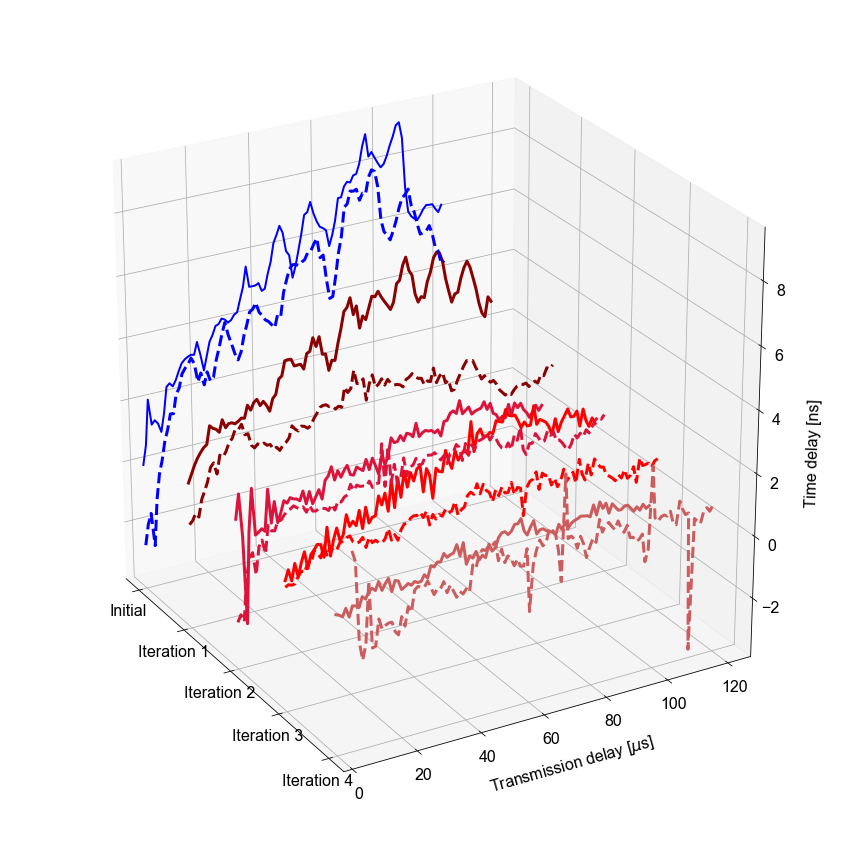

In [10]:
x = np.arange(0,5,1)
xx, yy = np.meshgrid(range(5), range(100)) 
fig = plt.figure(figsize=(12,12,))
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('Transmission delay [$\mu$s]', fontsize=16, labelpad=15)
ax.set_zlabel('Time delay [ns]', fontsize=16, labelpad=15)
ax.set_ylim(0,125)
# ax.set_zlim(-5,10)
ax.plot(dfi['Delays'], dfi['O1'], 0, '-', zdir='x', color='b', linewidth=2)
ax.plot(dfit1_O1['Delays'], dfit1_O1['O1'], 1, '-', zdir='x', color = colors[0], linewidth=3)
ax.plot(dfit2_O1['Delays'], dfit2_O1['O1'], 2, '-', zdir='x', color = colors[1], linewidth=3)
ax.plot(dfit3_O1['Delays'], dfit3_O1['O1'], 3, '-', zdir='x', color = colors[2], linewidth=3)
ax.plot(dfit4_O1['Delays'], dfit4_O1['O1'], 4, '-', zdir='x', color = colors[3], linewidth=3)

ax.plot(dfi['Delays'], dfi['O2'], 0, '--', zdir='x', color='b', linewidth=3)
ax.plot(dfit1_O2['Delays'], dfit1_O2['O2 (Run 1)'], 1, '--', zdir='x', color = colors[0], linewidth=3)
ax.plot(dfit2_O2['Delays'], dfit2_O2['O2'], 2, '--', zdir='x', color = colors[1], linewidth=3)
ax.plot(dfit3_O2['Delays'], dfit3_O2['O2'], 3, '--', zdir='x', color = colors[2], linewidth=3)
ax.plot(dfit4_O2['Delays'][5:], dfit4_O2['O2'][5:], 4, '--', zdir='x', color = colors[3], linewidth=3)

ax.set_xticks(np.arange(0, 5, 1))
ax.set_xticklabels(['Initial', 'Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4'])
ax.view_init(25, 330)
# ax.plot_surface(xx, yy, np.zeros_like(xx), alpha=0.25)
plt.tight_layout()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/NS/Salt-freeze3Dplot.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

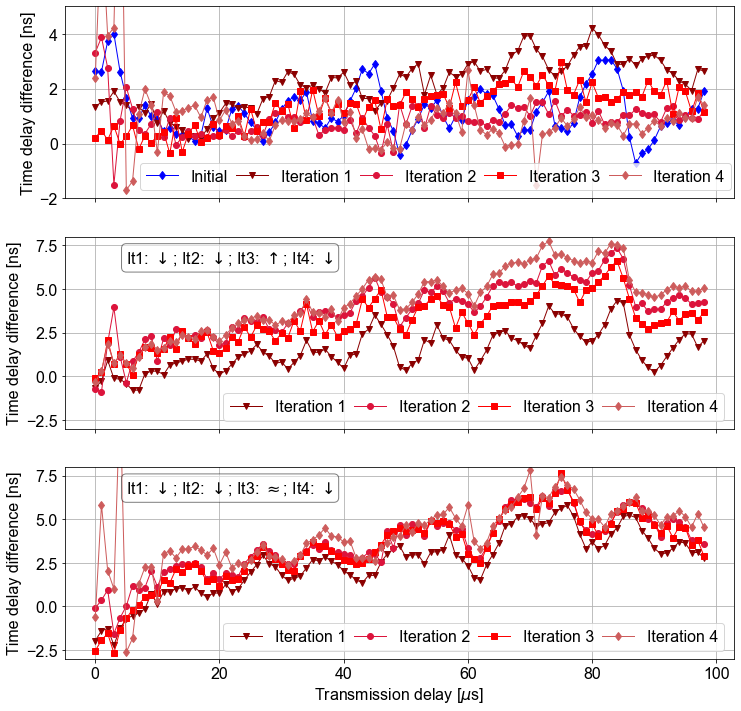

In [11]:
fig, ax = plt.subplots(3, 1, figsize =(12, 12), sharex = True)
ax[0].plot(dfi['Delays'], np.subtract(dfi['O1'], dfi['O2']), '-db', label='Initial', linewidth=1)
ax[0].plot(dfit1_O1['Delays'], np.subtract(dfit1_O1['O1'], dfit1_O2['O2 (Run 1)'][:99]), '-v', color = colors[0], label='Iteration 1', linewidth=1)
ax[0].plot(dfit2_O1['Delays'], np.subtract(dfit2_O1['O1'], dfit2_O2['O2'][:99]), '-o', color = colors[1], label='Iteration 2', linewidth=1)
ax[0].plot(dfit3_O1['Delays'], np.subtract(dfit3_O1['O1'], dfit3_O2['O2'][:99]), '-s', color = colors[2], label='Iteration 3', linewidth=1)
ax[0].plot(dfit4_O1['Delays'], np.subtract(dfit4_O1['O1'], dfit4_O2['O2'][:99]), '-d', color = colors[3], label='Iteration 4', linewidth=1)
ax[0].legend(loc='lowerright', bbox_to_anchor=(0.1, 0., 0.5, 0.5), ncol=5, columnspacing=0.5)

ax[1].plot(dfi['Delays'], np.subtract(dfi['O1'], dfit1_O1['O1']), '-v', color = colors[0], label='Iteration 1', linewidth=1)
ax[1].plot(dfi['Delays'], np.subtract(dfi['O1'], dfit2_O1['O1']), '-o', color = colors[1], label='Iteration 2', linewidth=1)
ax[1].plot(dfi['Delays'], np.subtract(dfi['O1'], dfit3_O1['O1']), '-s', color = colors[2], label='Iteration 3', linewidth=1)
ax[1].plot(dfi['Delays'], np.subtract(dfi['O1'], dfit4_O1['O1']), '-d', color = colors[3], label='Iteration 4', linewidth=1)
ax[1].text(5.0, 6.5, 'It1: $\downarrow$; It2: $\downarrow$; It3: $\\uparrow$; It4: $\\downarrow$', 
           bbox=dict(boxstyle="round", facecolor='white', alpha=0.5))
ax[1].legend(loc='lowerright', bbox_to_anchor=(0.225, 0., 0.5, 0.5), ncol=4, columnspacing=0.5)

ax[2].plot(dfi['Delays'], np.subtract(dfi['O2'], dfit1_O2['O2 (Run 1)'][:99]),'-v', color = colors[0], label='Iteration 1', linewidth=1)
ax[2].plot(dfi['Delays'], np.subtract(dfi['O2'], dfit2_O2['O2'][:99]),'-o', color = colors[1], label='Iteration 2', linewidth=1)
ax[2].plot(dfi['Delays'], np.subtract(dfi['O2'], dfit3_O2['O2'][:99]),'-s', color = colors[2], label='Iteration 3', linewidth=1)
ax[2].plot(dfi['Delays'], np.subtract(dfi['O2'], dfit4_O2['O2'][:99]),'-d', color = colors[3], label='Iteration 4', linewidth=1)
ax[2].text(5.0, 6.5, 'It1: $\downarrow$; It2: $\downarrow$; It3: $\\approx$; It4: $\downarrow$', 
           bbox=dict(boxstyle="round", facecolor='white', alpha=0.5))
ax[2].legend(loc='lowerright', bbox_to_anchor=(0.225, 0., 0.5, 0.5), ncol=4, columnspacing=0.5)

[ax[i].grid() for i in range(3)]
[ax[i].set_ylabel('Time delay difference [ns]') for i in range(3)]
ax[2].set_xlabel('Transmission delay [$\mu$s]')
ax[0].set_ylim(-2, 5)
ax[1].set_ylim(-3, 8)
ax[2].set_ylim(-3, 8)
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Salt-freeze-differences.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

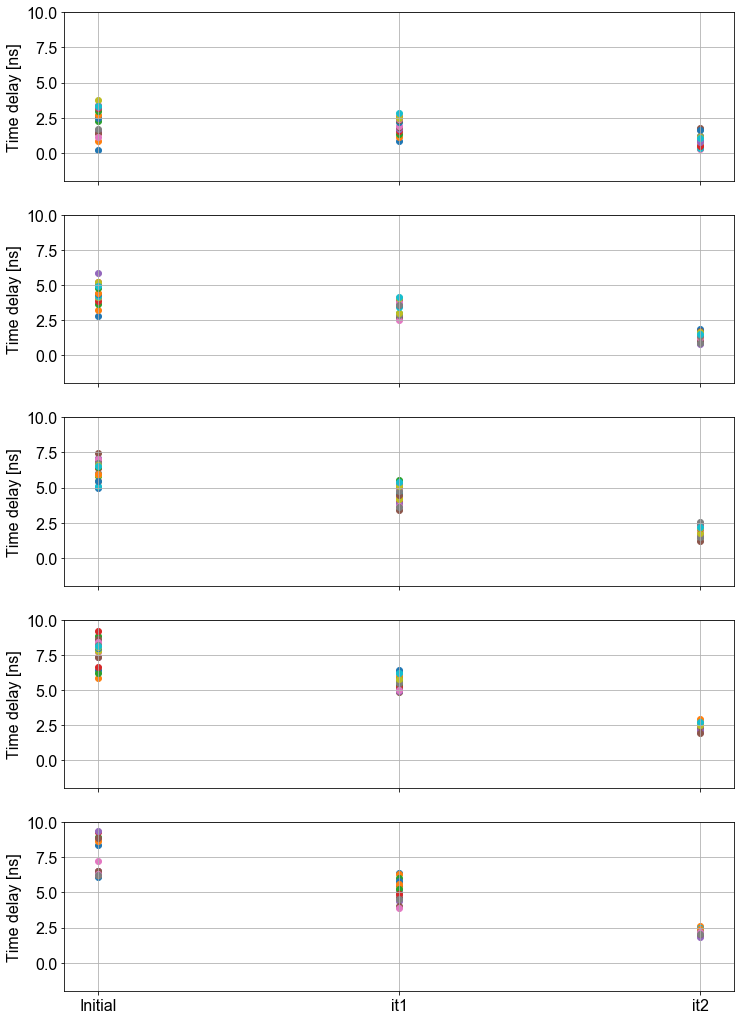

In [12]:
fig, ax =  plt.subplots(5, 1, figsize=(12, 18), sharex = True)
x = np.arange(0,3,1)
for j in range(5):
    if (j+1)*20 < 98:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:(j+1)*20]]
    else:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:98]]

[ax[i].grid() for i in range(5)]
[ax[i].set_ylabel('Time delay [ns]') for i in range(5)]
[ax[i].set_ylim(-2.0, 10) for i in range(5)]
ax[4].set_xticks(np.arange(0, 3, 1))
ax[4].set_xticklabels(['Initial', 'it1', 'it2'])

plt.show()

In [13]:
def parabola(x, a, b, c):
    return a*x**2+b*x+c

In [14]:
pars=[]
covs=[]
for i in range(99):
    par, cov = curve_fit(f=parabola, xdata=x, ydata=[dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]], 
                         p0=[0, 0, 0], bounds=(-np.inf, np.inf))
    pars.append(par)
    covs.append(cov)

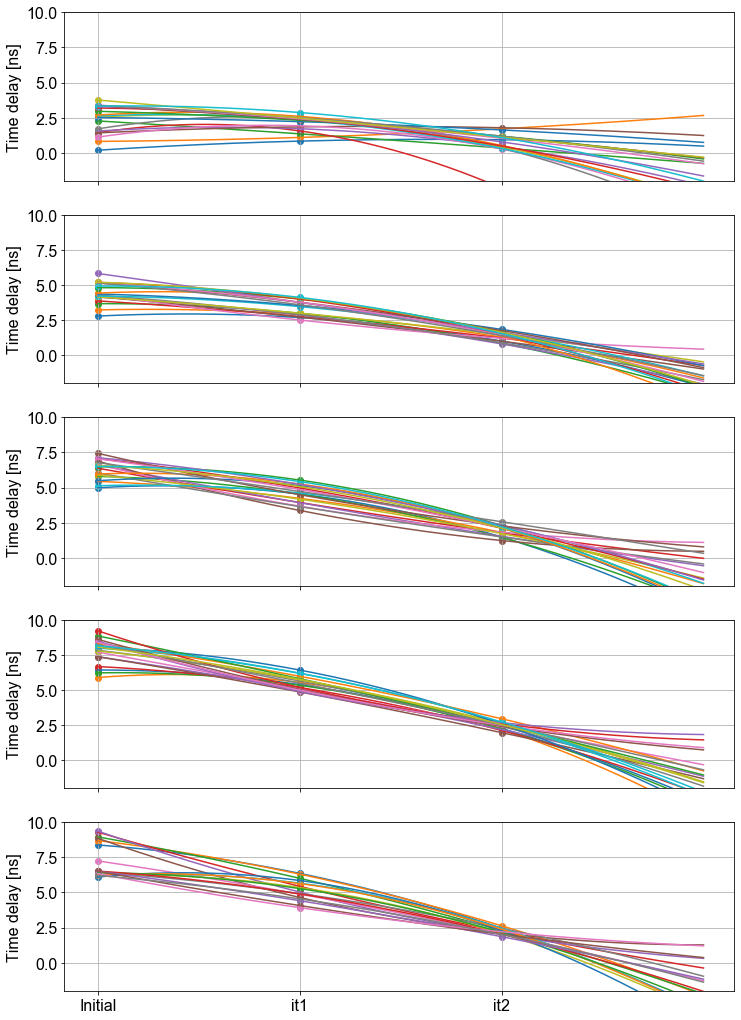

In [15]:
fig, ax =  plt.subplots(5, 1, figsize=(12, 18), sharex = True)
xx = np.linspace(0,3,1000)

for j in range(5):
    if (j+1)*20 < 98:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:(j+1)*20]]
        [ax[j].plot(xx, parabola(xx, p[0], p[1], p[2])) for p in pars[j*20:(j+1)*20]]
    else:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:98]]
        [ax[j].plot(xx, parabola(xx, p[0], p[1], p[2])) for p in pars[j*20:98]]

[ax[i].grid() for i in range(5)]
[ax[i].set_ylabel('Time delay [ns]') for i in range(5)]
[ax[i].set_ylim(-2.0, 10) for i in range(5)]
ax[4].set_xticks(np.arange(0, 3, 1))
ax[4].set_xticklabels(['Initial', 'it1', 'it2'])

plt.show()

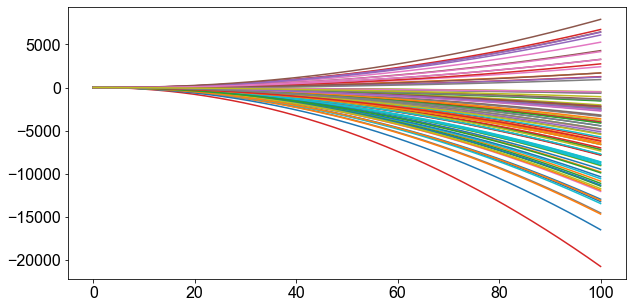

In [16]:
plt.figure(figsize = (10, 5))
xxx = np.linspace(0, 100, 10000)
[plt.plot(xxx, parabola(xxx, p[0], p[1], p[2])) for p in pars]
plt.show()

In [17]:
dfo1run1 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run1.txt', delimiter=' ' , dtype= np.float64)
dfo1run2 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run2.txt', delimiter=' ' , dtype= np.float64)
dfo1run3 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run3.txt', delimiter=' ' , dtype= np.float64)
dfo1run4 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run4.txt', delimiter=' ' , dtype= np.float64)
dfo1run5 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run5.txt', delimiter=' ' , dtype= np.float64)
dfo1run6 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run6.txt', delimiter=' ' , dtype= np.float64)
dfo1run7 = pd.read_csv('../Data/Cement_wt_cu_wires/O1/delays-from-all-runs/Run7.txt', delimiter=' ' , dtype= np.float64)

In [18]:
dfO1 = pd.concat([dfo1run1['Delays'], dfo1run1['Time-delay1'], dfo1run2['Time-delay2'], dfo1run3['Time-delay3'], 
                  dfo1run4['Time-delay4']], axis=1)
dfO1 = dfO1.rename(columns={"Delays": "Delays_Full", "Time-delay1": "Run1", "Time-delay2": "Run2", "Time-delay3": "Run3", 
                            "Time-delay4": "Run4"}, errors="raise")
dfO1 = pd.concat([dfO1, dfo1run5['Time-delay1'], dfo1run6['Time-delay2'], dfo1run7['Time-delay3']], axis=1)
dfO1 = dfO1.rename(columns={"Time-delay1": "Run5", "Time-delay2": "Run6", "Time-delay3": "Run7"}, 
                   errors="raise")
dfO1['mean'] = dfO1.iloc[:, 3:].mean(axis=1)
dfO1['std'] = dfO1.iloc[:, 3:].std(axis=1)

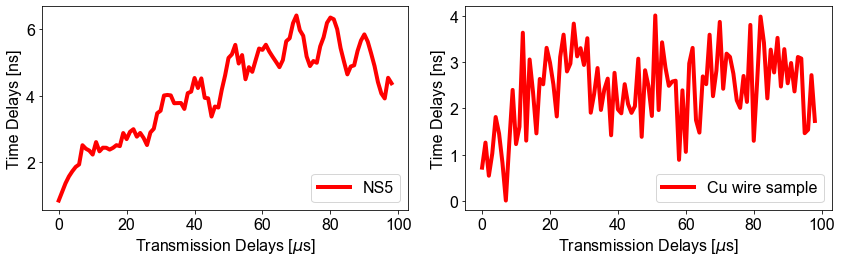

In [19]:
plt.figure(figsize=(12,7))
ax1 = plt.subplot(221)
ax1.margins(0.05)
ax1.plot(dfit1_O1['Delays'], dfit1_O1['O1'], linewidth=4, color = 'r', label='NS5')
ax1.set_xlabel('Transmission Delays [$\mu$s]')
ax1.set_ylabel('Time Delays [ns]')
ax1.legend(loc = 'lower right')


ax2 = plt.subplot(222)
ax2.margins(0.05)
plt.plot(dfO1['Delays_Full'], dfO1['mean'], '-', color = 'r', label = 'Cu wire sample', linewidth = 4)
ax2.set_xlabel('Transmission Delays [$\mu$s]')
ax2.set_ylabel('Time Delays [ns]')
ax2.legend(loc = 'lower right')
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/freq_comparison1.svg', dpi=300, bbox_inches='tight',
#            format='svg')
plt.tight_layout()
plt.show()

## Frequency Analysis

In [113]:
dfi['O1'][99]= (dfi['O1'][98]+dfi['O1'][97])/2

In [114]:
dfi['O1'].values

array([0.19177129, 0.81779108, 2.27583928, 1.43771039, 1.55571956,
       1.42413639, 1.12585582, 1.71107769, 2.54549783, 2.63668826,
       2.51515242, 2.69419491, 2.96028902, 3.19301739, 3.29354208,
       3.35647505, 3.39581244, 3.37195623, 3.76291753, 3.32542499,
       2.79509429, 3.23232812, 3.67855598, 3.87405744, 4.13960199,
       4.17880508, 4.33314678, 4.27766078, 4.15836023, 4.21453749,
       4.36224229, 4.42512048, 4.81582914, 5.18615377, 5.82451257,
       5.15017913, 5.14667801, 5.15048545, 5.2029702 , 4.92947328,
       4.97967716, 5.436641  , 5.79042198, 6.37419637, 6.60961443,
       6.88322526, 6.64116566, 6.03261079, 5.8766823 , 5.1289236 ,
       5.48091568, 5.96575222, 6.46952512, 7.0593326 , 7.12434013,
       7.43004293, 7.04550298, 6.7738543 , 6.56998418, 6.50660688,
       6.41919451, 5.88369331, 6.21653929, 6.66472373, 7.35882088,
       7.36409132, 7.69037342, 7.81802865, 7.77341365, 7.97733343,
       8.0064313 , 8.30595284, 8.84456467, 9.20620143, 8.47311

In [115]:
fft_initial_O1 = fftpack.fft(dfi['O1'].values) 
fft_initial_O2 = fftpack.fft(dfi['O2'].values)

# And the power (sig_fft is of complex dtype)
power_initial_O1 = np.abs(fft_initial_O1)**2
power_initial_O2 = np.abs(fft_initial_O2)**2

# The corresponding frequencies
freq_initial_O1 = fftpack.fftfreq(len(dfi['O1']), d=1e-6)
freq_initial_O2 = fftpack.fftfreq(len(dfi['O2']), d=1e-6)

pos_masks_initial_O1 = np.where(fft_initial_O1 > 0) 
pos_masks_initial_O2 = np.where(fft_initial_O2 > 0)

(0, 3000)

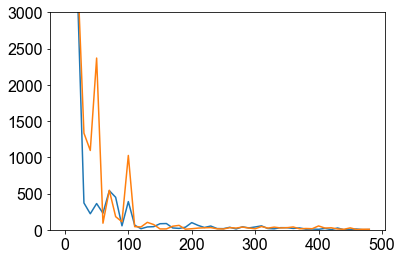

In [140]:
plt.plot(freq_initial_O1[:49]/1000, power_initial_O1[:49])
plt.plot(freq_initial_O2[:49]/1000, power_initial_O2[:49])
plt.ylim(0, 3000)

In [123]:
dfO1_salt = pd.concat([dfit1_O1['Delays'], dfit1_O1['O1'], dfit2_O1['O1'], dfit3_O1['O1'], dfit4_O1['O1']], axis=1)
dfO1_salt.columns = ['Delays', 'It1', 'It2', 'It3', 'It4']
dfO1_salt

,Delays,It1,It2,It3,It4
0,0.0,0.839757,0.936594,0.283873,0.544080
1,1.0,1.098837,1.714442,0.599574,0.497848
2,2.0,1.359015,0.351130,0.220265,0.423610
3,3.0,1.564573,-2.506419,0.744704,0.659175
4,4.0,1.720698,0.425405,0.293688,0.361729
...,...,...,...,...,...
94,94.0,4.409083,1.850804,3.316072,1.444455
95,95.0,4.065321,2.018824,2.928557,1.312106
96,96.0,3.915451,2.201605,2.716634,1.474675
97,97.0,4.537527,2.008166,2.963624,1.320236


In [124]:
dfO2_salt = pd.concat([dfit1_O2['Delays'], dfit1_O2['O2 (Run 2)'], dfit2_O2['O2'], dfit3_O2['O2'], 
                       dfit4_O2['O2']], axis=1)
dfO2_salt.columns = ['Delays', 'It1', 'It2', 'It3', 'It4']
dfO1_salt

,Delays,It1,It2,It3,It4
0,0.0,0.839757,0.936594,0.283873,0.544080
1,1.0,1.098837,1.714442,0.599574,0.497848
2,2.0,1.359015,0.351130,0.220265,0.423610
3,3.0,1.564573,-2.506419,0.744704,0.659175
4,4.0,1.720698,0.425405,0.293688,0.361729
...,...,...,...,...,...
94,94.0,4.409083,1.850804,3.316072,1.444455
95,95.0,4.065321,2.018824,2.928557,1.312106
96,96.0,3.915451,2.201605,2.716634,1.474675
97,97.0,4.537527,2.008166,2.963624,1.320236


(-4, 10)

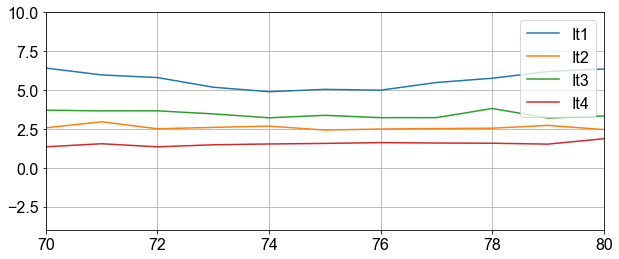

In [125]:
plt.figure(figsize=(10,4))
[plt.plot(dfO1_salt['Delays'], dfO1_salt[i], label=i) for i in dfO1_salt.keys()[1:]]
plt.legend()
plt.grid()
plt.xlim(70, 80)
plt.ylim(-4, 10)

(-4, 10)

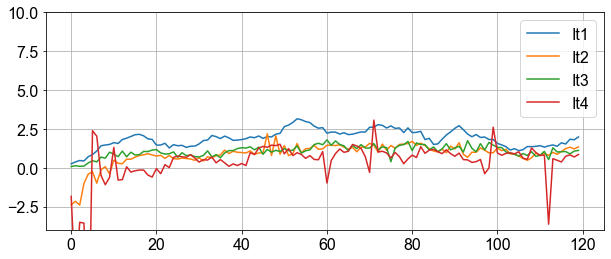

In [126]:
plt.figure(figsize=(10,4))
[plt.plot(dfO2_salt['Delays'], dfO2_salt[i], label=i) for i in dfO2_salt.keys()[1:]]
plt.legend()
plt.grid()
plt.ylim(-4, 10)

In [127]:
ffts_O1_salt = [fftpack.fft(dfO1_salt[r].values) for r in dfO1_salt.keys()[1:]]

# And the power (sig_fft is of complex dtype)
powers_O1_salt = [np.abs(fft)**2 for fft in ffts_O1_salt]

# The corresponding frequencies
freq_O1_salt = [fftpack.fftfreq(len(dfO1_salt[r]), d=1e-6) for r in dfO1_salt.keys()[1:]]

In [128]:
ffts_O2_salt = [fftpack.fft(dfO2_salt[r].values) for r in dfO2_salt.keys()[1:]]

# And the power (sig_fft is of complex dtype)
powers_O2_salt = [np.abs(fft)**2 for fft in ffts_O2_salt]

# The corresponding frequencies
freq_O2_salt = [fftpack.fftfreq(len(dfO2_salt[r]), d=1e-6) for r in dfO2_salt.keys()[1:]]

[2.93015682e+04 1.66256404e+03 1.97193903e+02 8.17876578e+01
 2.80342103e+01 1.71319399e+02 1.61644399e+01 2.21443573e+01
 1.72933172e+01 1.95522696e+01 4.33783722e+01 2.82666812e+01
 1.92535802e+01 1.56255866e+01 1.50524139e+01 6.09118219e+00
 3.42461615e+01 2.60581339e+01 2.18708927e+01 2.01401209e+01
 2.83699590e+01 3.68000745e+01 1.84446696e+01 2.51903409e+01
 3.24944433e+01 1.81061019e+01 1.56656732e+01 2.73395672e+01
 1.70055312e+01 2.81839455e+01 2.01260768e+01 1.65668010e+01
 1.72873282e+01 2.57915275e+01 1.39318241e+01 2.65416631e+01
 5.15180954e+01 2.73893433e+01 2.90948445e+01 7.32808701e+00
 1.22466401e+01 2.15711571e+00 1.29386552e+00 1.54444165e+00
 1.58890884e+01 1.60880783e+01 8.29166557e+00 3.89871415e-01
 4.67222268e-01]


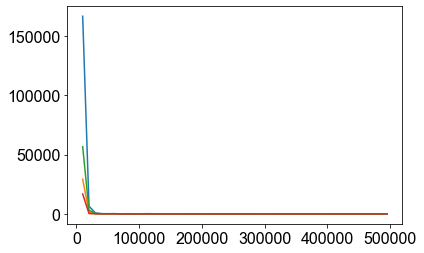

In [129]:
pos_masks_O1_salt = [np.where(f > 0) for f in freq_O1_salt]
freqs_O1_salt = [f[pos_mask] for f, pos_mask in zip(freq_O1_salt, pos_masks_O1_salt)]
peak_freqs_O1_salt = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O1_salt, 
                                                                                          powers_O1_salt, pos_masks_O1_salt)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
print(powers_O1_salt[1][:49])
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O1_salt, powers_O1_salt)] 
# plt.ylim(0,300)
plt.show()

[[<matplotlib.lines.Line2D at 0x21c5c8324c8>],

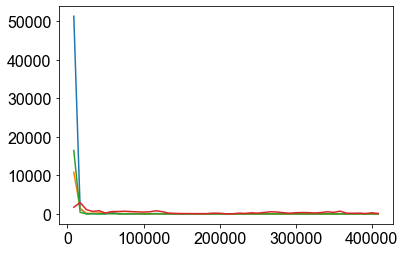

In [130]:
pos_masks_O2_salt = [np.where(f > 0) for f in freq_O2_salt]
freqs_O2_salt = [f[pos_mask] for f, pos_mask in zip(freq_O2_salt, pos_masks_O2_salt)]
peak_freqs_O2_salt = [freqs[power[post_mask].argmax()] for freqs, power, post_mask in zip(freqs_O2_salt, 
                                                                                          powers_O2_salt, pos_masks_O2_salt)]

# np.allclose(peak_freq, 1./period)

# # An inner plot to show the peak frequency
# axes = plt.axes([0.55, 0.3, 0.3, 0.5])
# plt.title('Peak frequency')
[plt.plot(freqs[:49], power[:49]) for freqs, power in zip(freqs_O2_salt, powers_O2_salt)] 
# plt.ylim(0,300)

# Orientation One

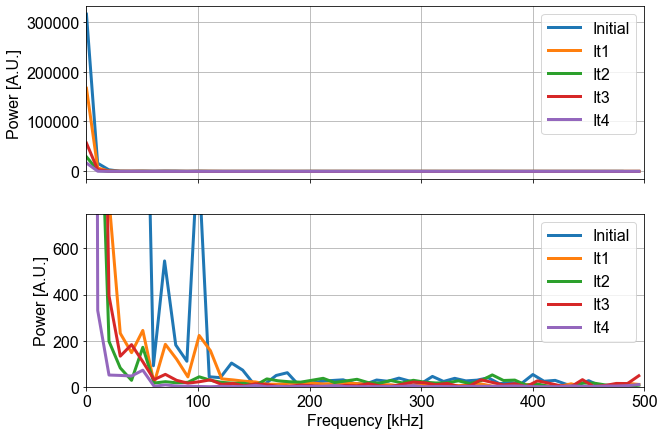

In [147]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7), sharex = True)
ax[0].plot(freq_initial_O1[:49]/1000, power_initial_O1[:49], label='Initial', linewidth=3)
[ax[0].plot(f[:round(len(freq_O1_salt[1])/2)]/1000, p[:round(len(freq_O1_salt[1])/2)], 
            label=str(r), linewidth=3) for f, p, r in zip(freq_O1_salt, powers_O1_salt, dfO1_salt.keys()[1:])]
ax[0].legend()
ax[0].grid()
ax[1].plot(freq_initial_O2[:49]/1000, power_initial_O2[:49], label='Initial', linewidth=3)
[ax[1].plot(f[:round(len(freq_O1_salt[1])/2)]/1000, p[:round(len(freq_O1_salt[1])/2)], 
             label=str(r), linewidth=3) for f, p, r in zip(freq_O1_salt, powers_O1_salt, dfO1_salt.keys()[1:])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 750)
ax[1].set_xlim(0, 500)
ax[1].set_xlabel('Frequency [kHz]')
[ax[i].set_ylabel('Power [A.U.]') for i in range(2)]
plt.show()

# Orientation Two

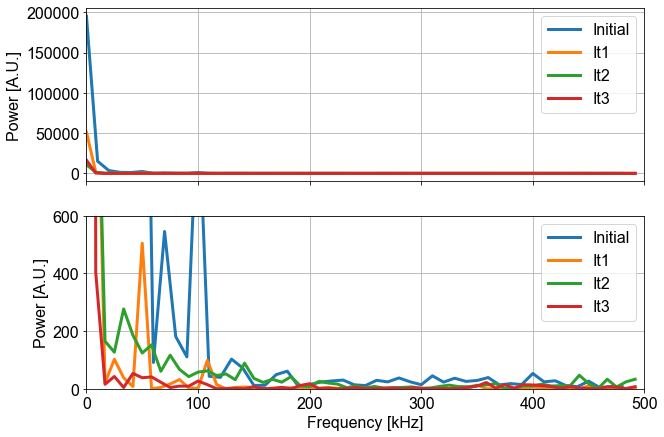

In [149]:
fig, ax  = plt.subplots(2, 1, figsize=(10, 7), sharex = True)
ax[0].plot(freq_initial_O2[:49]/1000, power_initial_O2[:49], label='Initial', linewidth=3)
[ax[0].plot(f[:round(len(freq_O2_salt[1])/2)]/1000, p[:round(len(freq_O2_salt[1])/2)], 
            label=str(r), linewidth=3) for f, p, r in zip(freq_O2_salt[:3], powers_O2_salt[:3], dfO2_salt.keys()[1:4])]
ax[0].legend()
ax[0].grid()
ax[1].plot(freq_initial_O2[:49]/1000, power_initial_O2[:49], label='Initial', linewidth=3)
[ax[1].plot(f[:round(len(freq_O2_salt[1])/2)]/1000, p[:round(len(freq_O2_salt[1])/2)],
            label=str(r), linewidth=3) for f, p, r in zip(freq_O2_salt[:3], powers_O2_salt[:3], dfO2_salt.keys()[1:4])]
ax[1].legend()
ax[1].grid()
ax[1].set_ylim(0, 600)
ax[1].set_xlim(0, 500)
ax[1].set_xlabel('Frequency [kHz]')
[ax[i].set_ylabel('Power [A.U.]') for i in range(2)]
plt.show()

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


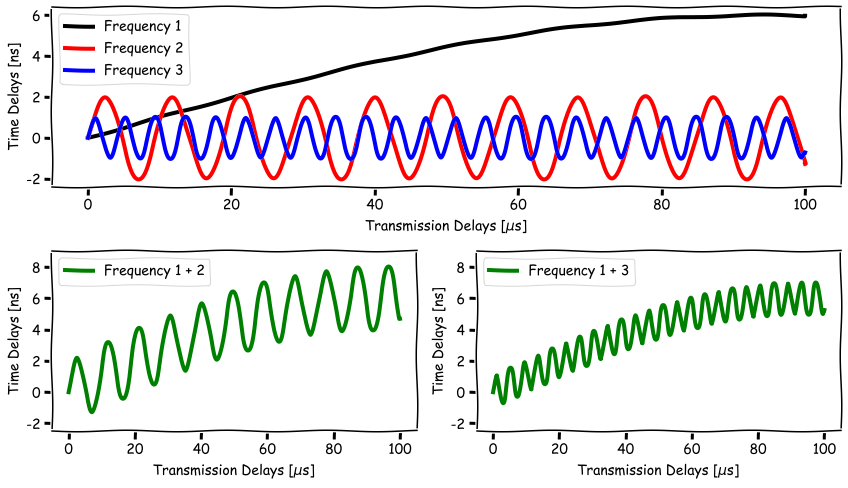

In [38]:
x = np.linspace(0,100,10000)
plt.figure(figsize=(12,7))
ax1 = plt.subplot(211)
ax1.margins(0.05)
plt.xkcd(scale=0.75, length=100, randomness=1)
ax1.plot(x, 6*np.sin((1/60)*x),'k', linewidth=4, label='Frequency 1')
ax1.plot(x, 2*np.sin((1/1.5)*x),'r', linewidth=4, label='Frequency 2')
ax1.plot(x, np.sin(1.5*x), 'b', linewidth=4, label='Frequency 3')
ax1.set_xlabel('Transmission Delays [$\mu$s]')
ax1.set_ylabel('Time Delays [ns]')

ax2 = plt.subplot(223)
ax2.margins(2, 2)
ax2.plot(x,  6*np.sin((1/60)*x)+2*np.sin((1/1.5)*x), 'g', linewidth=4, label='Frequency 1 + 2')
ax2.set_xlim(-5, 105)
ax2.set_ylim(-2.5, 9)
ax2.set_xlabel('Transmission Delays [$\mu$s]')
ax2.set_ylabel('Time Delays [ns]')

ax3 = plt.subplot(224)
ax3.margins(x=0, y=-0.25)
ax3.plot(x,  6*np.sin((1/60)*x)+np.sin(1.5*x), 'g', linewidth=4, label='Frequency 1 + 3')
ax3.set_xlim(-5, 105)
ax3.set_ylim(-2.5, 9)
ax3.set_xlabel('Transmission Delays [$\mu$s]')
ax3.set_ylabel('Time Delays [ns]')

ax1.legend()
ax2.legend()
ax3.legend()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/freq_comparison2.png', dpi=300, bbox_inches='tight',
#            format='png')
plt.tight_layout()
plt.show()